Se analizaran los datos de Grupo Financiero Inbursa, desde el 7-02-2001 hasta 4-02-2021

In [1]:
import torch, pywt, csv, numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import reader1 as rd
import utilerias as utls
#import pyrenn as renn
from NARNN import NARNN 


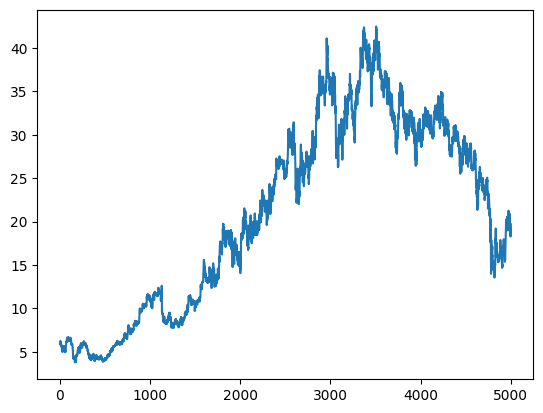

In [2]:

# Abrir el archivo CSV en modo lectura
#DATOS = 'C_Egipto_diario.csv'
DATOS = 'cierre.csv'
#Grupo Financiero Inbursa
cierre_inbursa = rd.leer_archivo('cierre.csv')
cierre = rd.leer_archivo(DATOS)
#se convierten todos los valores a flotantes
cierre = cierre.astype(float)
x = np.arange(1, (cierre.shape[0]+1))


# Crear un gráfico de línea con los valores de x, y
plt.plot(x, cierre)

# Mostrar el gráfico
plt.show()

#Eleccion de Mother Wavelet

Se elige las mother wavelets dependiendo de las caracteristicas de la serie de tiempo que se va a analizar. Para series que impliquen cambios no periodicos y repentinos es recomendable usar Haar ya que responde bien a estos cambios repentinos.

Se elige bior3.5 debido a las caracteristicas de las fluctuaciones entre periodos con altas cantidades de inversiones y periodos en los que no.

En general, el mother wavelet debe de ser una funcion de las caracteristicas de la serie original para que esta pueda ser reconstruida o analizada 

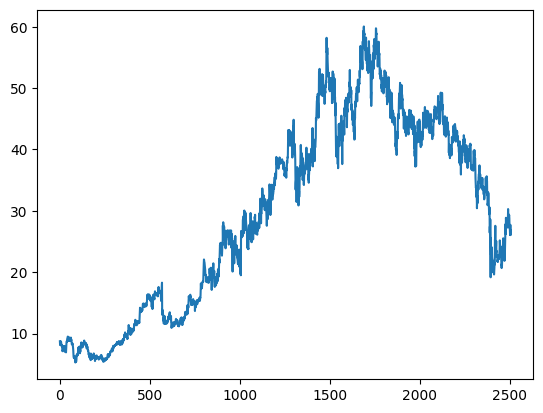

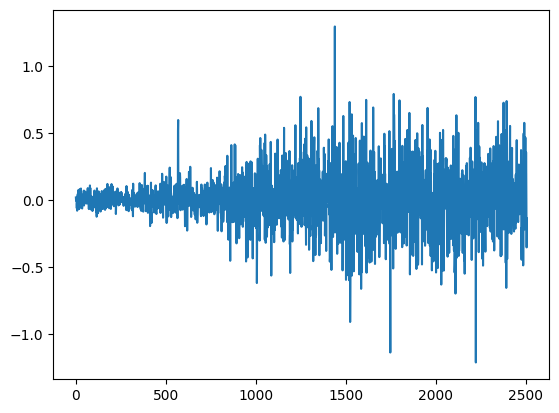

In [3]:
#Se descompone la lista de precios de cierre del intervalo mencionado anteriormente a partir de la dwt con la función bior3.5
(cA, cD) = pywt.dwt(cierre.tolist(), 'bior3.5')

# cA.size = 2505, cD.size = 2505
plt.plot(x[:len(cA)], cA[:len(cA)])
plt.show()

plt.plot(x[:len(cD)], cD[:len(cD)])
plt.show()

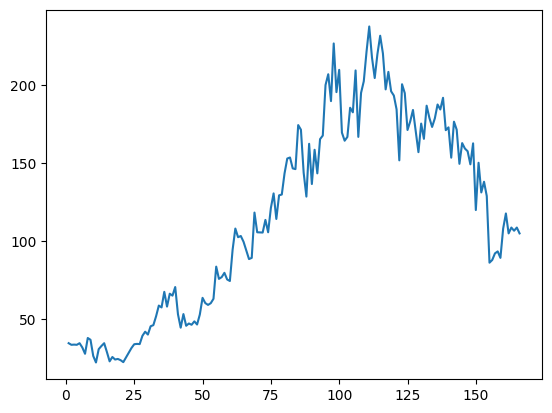

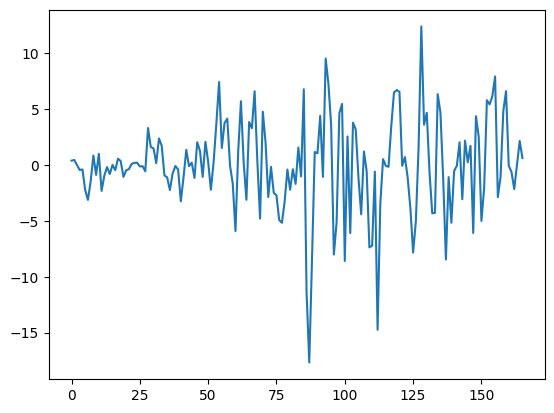

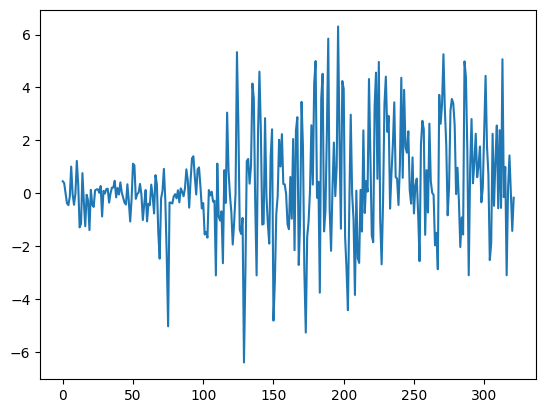

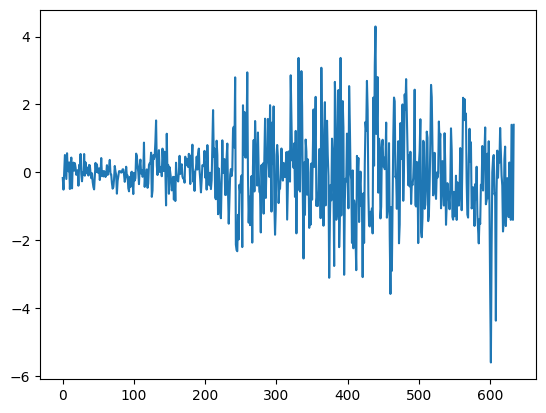

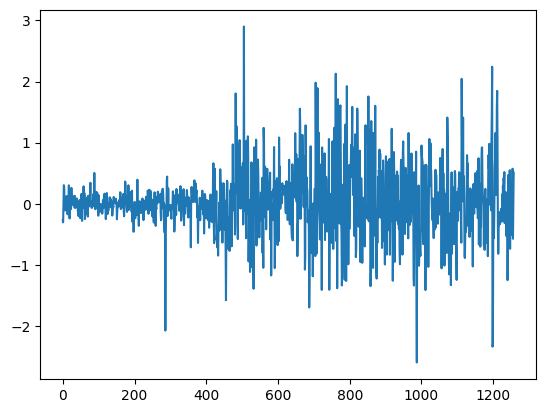

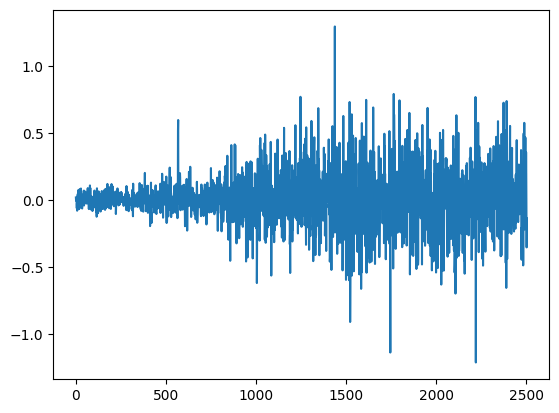

In [4]:
#Se realiza el proceso 5 veces
coeffs = pywt.wavedec(cierre, 'bior3.5', level=5)

cA = coeffs[0]
plt.plot(x[:len(cA)], cA)
plt.show()

cD_1 = coeffs[1]
cD_2 = coeffs[2]
cD_3 = coeffs[3]
cD_4 = coeffs[4]
cD_5 = coeffs[5]
plt.plot(range(len(cD_1)), cD_1)
plt.show()

plt.plot(range(len(cD_2)), cD_2)
plt.show()

plt.plot(range(len(cD_3)), cD_3)
plt.show()

plt.plot(range(len(cD_4)), cD_4)
plt.show()

plt.plot(range(len(cD_5)), cD_5)
plt.show()


In [5]:
A5=coeffs[0]#coeficientes de analisis
D1=coeffs[1]#coeficientes de detalle
D2=coeffs[2]
D3=coeffs[3]
D4=coeffs[4]
D5=coeffs[5]

#Se normalizan cada uno de los elementos de los vectores contenidos en las descomposicion de la serie de tiempo original
coeffs_n = [utls.normalizar(vect) for vect in coeffs]

#Estos 6 arreglos representan la descomposición de la señal original. Se tendrán que armar 6 redes que predigan cada una de estas
#componentes, Las entradas correspondientes a cada una son las 8 semanas anteriores para calcular la novena


entrenamiento,prueba,validacion = utls.generar_conjuntos(coeffs_n,False,5)
#la de abajo es una prueba
#entrenamiento,prueba,validacion = utls.generar_conjuntos([[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10]],False,1)

In [6]:
#print(prueba)
for i in prueba:
    print(len(i))
prueba_8_1 = [[],[],[],[],[],[]]
for e in range(6):
    prueba_8_1[e] = utls.corrimiento_t_1(prueba[e],9)
print(prueba_8_1[0])

50
50
97
191
378
752
[tensor([[0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.6919]]), tensor([[0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.6919, 0.7178]]), tensor([[0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.6919, 0.7178, 0.7516]]), tensor([[0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.6919, 0.7178, 0.7516, 0.6890]]), tensor([[0.7532, 0.6016, 0.8280, 0.8016, 0.6919, 0.7178, 0.7516, 0.6890, 0.6260]]), tensor([[0.6016, 0.8280, 0.8016, 0.6919, 0.7178, 0.7516, 0.6890, 0.6260, 0.7110]]), tensor([[0.8280, 0.8016, 0.6919, 0.7178, 0.7516, 0.6890, 0.6260, 0.7110, 0.6656]]), tensor([[0.8016, 0.6919, 0.7178, 0.7516, 0.6890, 0.6260, 0.7110, 0.6656, 0.7642]]), tensor([[0.6919, 0.7178, 0.7516, 0.6890, 0.6260, 0.7110, 0.6656, 0.7642, 0.7282]]), tensor([[0.7178, 0.7516, 0.6890, 0.6260, 0.7110, 0.6656, 0.7642, 0.7282, 0.7010]]), tensor([[0.7516, 0.6890, 0.6260, 0.7110, 0.6656, 0.7642, 0.7282, 0.7010, 0.7264]]), tensor([[0.6890, 0.6260, 0.7110, 0.6656, 0.7642, 0.728

In [7]:
red_A1 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D1 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D2 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D3 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D4 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)
red_D5 = NARNN(input_dim=8, hidden_dim=0, output_dim=1, num_layers=0)


#entradas ya procesadas
entrenamiento_8_1 = [[],[],[],[],[],[]]
prueba_8_1 = [[],[],[],[],[],[]]

# A cada uno de los conjuntos de entrenamiento se les da una forma de entrada en especifico,
# que es un arreglo de 8 y uno de un solo elemento para representar la salida
for e in range(6):
    entrenamiento_8_1[e] = utls.corrimiento_t_1(entrenamiento[e],9)
    prueba_8_1[e] = utls.corrimiento_t_1(prueba[e],9)
    
#la forma de la entrada de la red neuronal
print(entrenamiento_8_1[0])
print(len(entrenamiento_8_1[0]))
#salida = red(entrenamiento_8_1[0][:, :8])
#print(salida)


[tensor([[0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675]]), tensor([[0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194]]), tensor([[0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000]]), tensor([[0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397]]), tensor([[0.0574, 0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491]]), tensor([[0.0446, 0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573]]), tensor([[0.0259, 0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311]]), tensor([[0.0728, 0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034]]), tensor([[0.0675, 0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163]]), tensor([[0.0194, 0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163, 0.0088]]), tensor([[0.0000, 0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163, 0.0088, 0.0105]]), tensor([[0.0397, 0.0491, 0.0573, 0.0311, 0.0034, 0.0163, 0.0088, 0.0105, 0.

In [8]:

#params = red_A1.parameters()
#--utls.entrena(red_A1,0,entrenamiento_8_1,50)
EPOCAS = 5
utls.entrena_LM(red_A1,0,entrenamiento_8_1,EPOCAS)
utls.entrena_LM(red_D1,1,entrenamiento_8_1,EPOCAS)
utls.entrena_LM(red_D2,2,entrenamiento_8_1,EPOCAS)
utls.entrena_LM(red_D3,3,entrenamiento_8_1,EPOCAS)
utls.entrena_LM(red_D4,4,entrenamiento_8_1,EPOCAS)
utls.entrena_LM(red_D5,5,entrenamiento_8_1,EPOCAS)

paramtros antes: Parameter containing:
tensor([[-0.0231,  0.1269, -0.2694, -0.0582,  0.2959, -0.0133, -0.3371,  0.2336],
        [-0.2307, -0.1189,  0.0363, -0.0133, -0.2283, -0.0118, -0.2885, -0.0234],
        [ 0.3301,  0.3329, -0.1870, -0.1539, -0.0980,  0.2178,  0.3260, -0.2933],
        [-0.0479, -0.2676, -0.3297,  0.0668, -0.0776,  0.0063,  0.0443,  0.1670],
        [ 0.0298,  0.1915,  0.0860, -0.1183,  0.2651,  0.2805, -0.2214, -0.2771],
        [-0.2579,  0.0248, -0.0942,  0.3153,  0.2091, -0.2379, -0.2519,  0.1382],
        [-0.1234, -0.1888,  0.3014, -0.2791,  0.1293, -0.3434, -0.2236, -0.0160],
        [-0.0487, -0.3014,  0.2967, -0.2293,  0.0507,  0.0328,  0.0409,  0.0768],
        [-0.1203, -0.3115,  0.2766,  0.1343, -0.3011,  0.0997, -0.1300,  0.2059],
        [ 0.2333, -0.0154, -0.1807,  0.2536,  0.1612,  0.2293,  0.0337,  0.0557]],
       requires_grad=True)
INICIO DE EPOCA...
>>Ventana Actual: 1
 >> Entrada: tensor([[0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.02

In [9]:
#print("paramtros despues: " + str([i for i in red_A1.parameters()][0]))
#print(red_A1(torch.Tensor([0.8709, 0.6840, 0.6600, 0.6713, 0.7581, 0.7445, 0.8692, 0.6714])))

In [10]:
#entradas ya procesadas
# entrenamiento_8_1 = [[],[],[],[],[],[]]

# A cada uno de los conjuntos de entrenamiento se les da una forma de entrada en especifico,
# que es un arreglo de 8 y uno de un solo elemento para representar la salida
# for e in range(6):
#     entrenamiento_8_1[e] = utls.corrimiento_t_1(entrenamiento[e],9)

#pruebas_ordenadas = []

# for e in range(6):
#     entrenamiento_8_1[e] = utls.corrimiento_t_1(entrenamiento[e],9)

#for c_pruebas in entrenamiento:#entre
    #print("corrimiento: " + str(utls.corrimiento_t_1(c_pruebas,9)))
 #   pruebas_ordenadas.append(utls.corrimiento_t_1(c_pruebas,9))#prueba[0] es el conjunto de prueba para cada red
#pruebas = forma_entrada(prueba[0],9)#prueba[0] es el conjunto de prueba para A1
#print(utls.genera_prediccion_1(pruebas_ordenadas[0],red_A1))
#print(len(utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0]))
#print(entrenamiento[0])


Salida predecida:tensor([[-0.2364]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.2364], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.2397]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.2364, -0.2397], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.2544]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.2364, -0.2397, -0.2544], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.2601]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.2364, -0.2397, -0.2544, -0.2601], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.2539]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.2364, -0.2397, -0

d:\MALIERA\Documents\[00] Stock_Exchange\Stock_Exchange_NN_PP\src\utilerias.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  serie = torch.tensor(c_pruebas[0][:, :8][0].clone().detach())


Salida predecida:tensor([[-0.1715]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1676]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1770]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676, -0.1770], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1891]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676, -0.1770, -0.1891], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1794]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676, -0

d:\MALIERA\Documents\[00] Stock_Exchange\Stock_Exchange_NN_PP\src\utilerias.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  serie = torch.tensor(c_pruebas[0][:, :8][0].clone().detach())


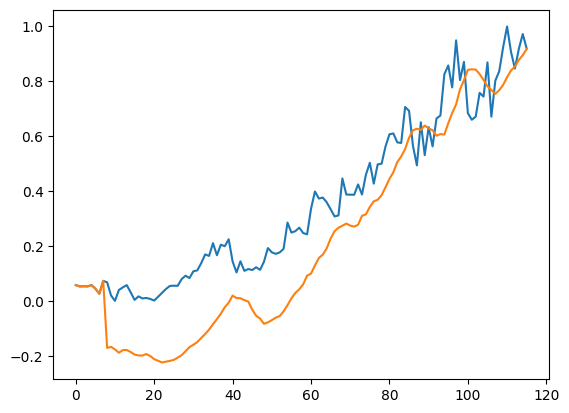

Salida predecida:tensor([[0.8064]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064],
       grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7863]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863], grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7703]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863, 0.7703], grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7722]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863, 0.7703, 0.7722], grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7691]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863, 0.7703, 0.7722, 0.7691], grad_fn=<CatBackward0>)
Salida pred

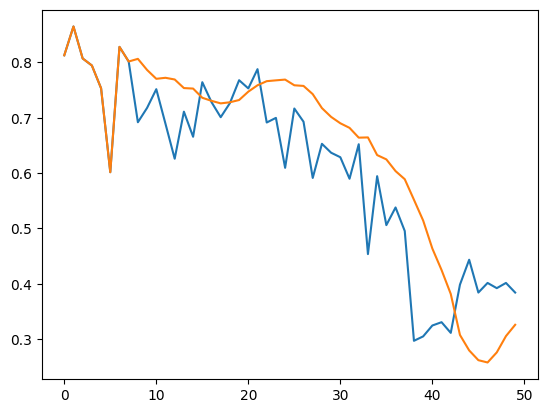

[0.81280927 0.86488167 0.80708521 0.79440233 0.75323313 0.60158617
 0.82804043 0.80158034 0.69185568 0.71781569 0.75158265 0.689009
 0.6259552  0.71098042 0.66563454 0.76420858 0.72824393 0.70097231
 0.72644053 0.76779128 0.75298823 0.78775683 0.6913776  0.69977333
 0.60954454 0.7166723  0.69280521 0.59122007 0.65289663 0.63678634
 0.62863523 0.5897861  0.65217408 0.45366899 0.5944051  0.50599046
 0.53791292 0.49539961 0.29700349 0.30497147 0.32464658 0.33062864
 0.31132227 0.39851368 0.44343923 0.38416685 0.40155024 0.392112
 0.40155024 0.38416685]


In [14]:
#Se grafica el conjunto de entrenamiento
plt.plot(range(len(entrenamiento[0])), entrenamiento[0])
plt.plot(range(len(entrenamiento[0])), utls.genera_prediccion_1(entrenamiento_8_1[0],red_A1).detach().numpy())
plt.show()

#Se grafica el conjunto de pruebas
plt.plot(range(len(prueba[0])), prueba[0])
plt.plot(range(len(prueba[0])), utls.genera_prediccion_1(prueba_8_1[0],red_A1).detach().numpy())
plt.show()

#plt.plot(range(108), entrenamiento[0][:-8])
#plt.plot(range(108), [utls.desnormalizar(vect) for vect in utls.genera_prediccion(pruebas_ordenadas[0],red_A1).detach().numpy().tolist()[0]])
# Mostrar el gráfico
#plt.show()
#investigar bien la dwt y predecir la red con los corrimientos de 1, usando los datos que predice o solo los datos que le doy
#Lo que hace es generar una prediccion cada noveno día, con los datos que ya se le dan del entrenamiento, es preciso ajustar los parametros hasta que ambas series
#sean iguales
print(prueba[0])

#Generamos el entrenamiento predictivo

In [12]:
#print(entrenamiento_8_1)
utls.entrena_LM_1(red_A1,0,entrenamiento_8_1,EPOCAS)

tensor([[0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728, 0.0675]])
INICIO DE EPOCA...
>>Ventana Actual: 1
serie: tensor([0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728])
Entradaas: tensor([0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728])
 >> Entrada: tensor([0.0574, 0.0526, 0.0532, 0.0526, 0.0574, 0.0446, 0.0259, 0.0728])
>>Se calcula perdida inicial...
----->SALIDA DE LA RED OBTENIDA: tensor([-0.2364], grad_fn=<AddBackward0>)
----->SALIDA ESPERADA: tensor([0.0675])
epoca: 1
>>Inicio de paso (Los valores de la perdida aqui contenidos solo son usados para calculos)
----->SALIDA DE LA RED OBTENIDA: tensor([-0.2364], grad_fn=<AddBackward0>)
----->SALIDA ESPERADA: tensor([0.0675])
----->SALIDA DE LA RED OBTENIDA: tensor([-0.2364], grad_fn=<AddBackward0>)
----->SALIDA ESPERADA: tensor([0.0675])
>>Fin de paso
>>Se calcula perdida despues del paso...
----->SALIDA DE LA RED OBTENIDA: tensor([45.2799], grad_fn=<AddBackward0>)
----->SALIDA ESPERADA

C:\Users\maliera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


----->SALIDA DE LA RED OBTENIDA: tensor([-0.3383], grad_fn=<AddBackward0>)
----->SALIDA ESPERADA: tensor([0.0194])
>>Fin de paso
>>Se calcula perdida despues del paso...
----->SALIDA DE LA RED OBTENIDA: tensor([0.2441], grad_fn=<AddBackward0>)
----->SALIDA ESPERADA: tensor([0.0194])
Error Anterior: 0.12794141471385956
Error nuevo: 0.0504671111702919
Se registra la perdida: 1 tensor(0.0505, grad_fn=<MseLossBackward0>)
Finaliza exec...
paramtros red antes de salir del ejec Parameter containing:
tensor([[ 0.1379,  0.2895, -0.1070,  0.0959,  0.4577,  0.1528, -0.1432,  0.3561],
        [-0.1497, -0.0257,  0.1375,  0.0815, -0.1292,  0.0841, -0.1812,  0.0323],
        [ 0.4557,  0.4603, -0.0504, -0.0153,  0.0411,  0.3464,  0.4884, -0.2498],
        [ 0.1152, -0.1045, -0.1620,  0.2329,  0.0942,  0.1712,  0.2421,  0.2674],
        [ 0.4405,  0.5619,  0.5016,  0.2705,  0.6923,  0.7090,  0.2779,  0.1975],
        [-0.1088,  0.1637,  0.0610,  0.4690,  0.3698, -0.0850, -0.0721,  0.2372],
        [ 

Salida predecida:tensor([[-0.1715]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1676]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1770]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676, -0.1770], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1891]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676, -0.1770, -0.1891], grad_fn=<CatBackward0>)
Salida predecida:tensor([[-0.1794]], grad_fn=<AddmmBackward0>)
serie: tensor([ 0.0574,  0.0526,  0.0532,  0.0526,  0.0574,  0.0446,  0.0259,  0.0728,
        -0.1715, -0.1676, -0

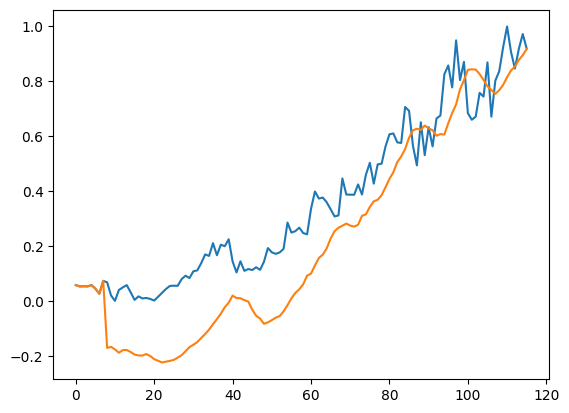

Salida predecida:tensor([[0.8064]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064],
       grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7863]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863], grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7703]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863, 0.7703], grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7722]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863, 0.7703, 0.7722], grad_fn=<CatBackward0>)
Salida predecida:tensor([[0.7691]], grad_fn=<AddmmBackward0>)
serie: tensor([0.8128, 0.8649, 0.8071, 0.7944, 0.7532, 0.6016, 0.8280, 0.8016, 0.8064,
        0.7863, 0.7703, 0.7722, 0.7691], grad_fn=<CatBackward0>)
Salida pred

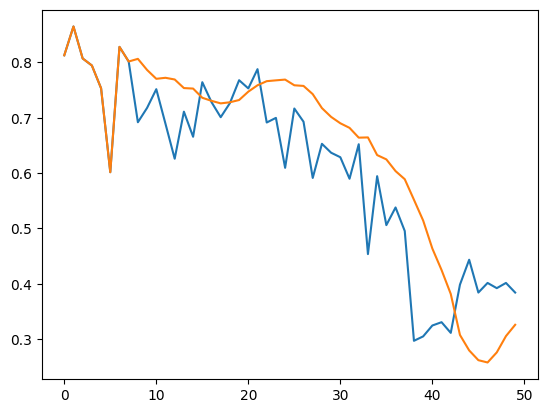

In [13]:

# pruebas_ordenadas_p = []

# for c_pruebas in entrenamiento:#prueba
#     pruebas_ordenadas_p.append(utls.corrimiento_t_1(c_pruebas,9))#prueba[0] es el conjunto de prueba para cada red
# print(utls.genera_prediccion_1(pruebas_ordenadas_p[0],red_A1))

plt.plot(range(len(entrenamiento[0])), entrenamiento[0])
plt.plot(range(len(entrenamiento[0])), utls.genera_prediccion_1(entrenamiento_8_1[0],red_A1).detach().numpy())
plt.show()

plt.plot(range(len(prueba[0])), prueba[0])
plt.plot(range(len(prueba[0])), utls.genera_prediccion_1(prueba_8_1[0],red_A1).detach().numpy())
plt.show()